<h3>Làm quen với mạng MLP với dữ liệu Fashion-MNIST</h3> <br>
&copy; DeepAI-Solutions <br>
Trước tiên chúng ta làm quen với việc sử dụng Keras xây dựng một mạng mlp. <br>
Mạng mlp (multilayer perceptrons) là mạng được tạo bởi các layer xếp chồng lên nhau <br> 
Một layer có các neurons (perceptrons) kết nối với từng neurons (perceptrons) ở layer phía trước <br> 
Mỗi layer như vậy thường được gọi là Dense Layer hoặc Fully Connected Layer (kết nối đầy đủ). <br> 

<img src='figs/neural_network.png' width=600 height=400/>

Hãy thử nghiệm trên dữ liệu Fashion-MNIST để phân loại ảnh đầu vào là đồ thời trang (quần áo, giày dép, túi xách). (xem hình dưới) <br> 
Tập dữ liệu Fashion-MNIST gồm có 60,000 mẫu dữ liệu dùng để huấn luyện (training set) và 10,000 mẫu dữ liệu dùng để kiểm tra độ chính xác (test set). <br> 
Mỗi mẫu dữ liệu đầu vào là một ma trận có kích thước 28x28 (tương ứng với ảnh đầu vào dạng gray scale có chiều rộng 28 và chiều cao 28). Đầu ra của mỗi mẫu dữ liệu là một nhãn (label) tương ứng với một loại đồ thời trang, cụ thể:
0 T-shirt/top 
1 Trouser 
2 Pullover 
3 Dress 
4 Coat 
5 Sandal 
6 Shirt 
7 Sneaker 
8 Bag 
9 Ankle boot <br>
Như vậy trung bình cứ mỗi một loại nhãn sẽ có 6000 ảnh dữ liệu để huấn luyện (training) và 1000 ảnh dữ liệu để kiểm tra (test).<br>
Xem thêm tại: https://github.com/zalandoresearch/fashion-mnist

<img src='figs/pullover-example.png' width=300 height=300/>

<h4>I. Tải và xử lý dữ liệu </h4> <br>
Ở đây chúng ta sử dụng module build sẵn trong Keras để tải và đọc dữ liệu vào. <br>
Chúng ta cũng có thể download dữ liệu từ các nguồn khác. <br> 
Nhưng dù bằng cách nào thì mục tiêu là đọc vào được dữ liệu là các mảng X - đầu vào, y - nhãn <br>
Sau đó chúng ta chia thành các tập dữ liệu train và test <br> 
(Reference: https://github.com/keras-team/keras)

1 - Import các thư viện cần thiết

In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras import backend as K
import numpy as np
import random
random.seed(123)

/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2 - Load dữ liệu <br>
Trước tiên định nghĩa một số tham số cơ bản, batch_size là kích thước một mẻ dữ liệu, num_classes là số loại nhãn, epochs là số vòng lặp huấn luyện, img_rows là số hàng, img_cols là số cột

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Nếu quan sát đoạn code dưới đây bạn sẽ thấy các bước như sau: <br>
- Trước tiên chúng ta load ra dữ liệu bằng câu lệnh fashion_mnist.load_data()
- Tiếp theo chúng ta đưa mỗi dữ liệu đầu vào thứ $X_i$ về dạng mảng (chiều cao, chiều rộng, số kênh) với câu lệnh: <br>
x_train.reshape
Lưu ý: Ở đây có thể chọn việc đặt chiều channel (kênh) lên trước hoặc ra sau, xem input_shape được khởi tạo
- Dữ liệu đầu vào được đưa về kiểu float32 và chuẩn hoá theo từng pixel bằng cách chia cho 255
- Dữ liệu nhãn được chuyển từ dạng integer về dạng one-hot-vector. Ví dụ: 2 => [0 0 1 0 0 0 0 0 0 0]

In [3]:

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train_org = np.copy(y_train)
y_test_org = np.copy(y_test)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 11s 2us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
print(y_train)

Như vậy chúng ta đã có dữ liệu để huấn luyện x_train, y_train và dữ liệu để kiểm tra x_test và y_test. Dưới đây ta vẽ một mẫu dữ liệu dưới dạng ảnh để có cái nhìn trực quan <br>

(28, 28, 1)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


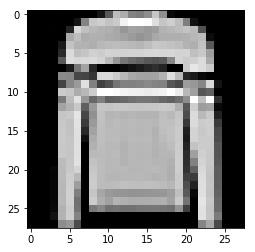

In [29]:
import matplotlib.pyplot as plt
# Show one of the images from the training dataset
# plt.figure(figsize = (1.0,1.0))
img_index = 5
print(x_train[img_index].shape)
print(y_train[img_index])
plt.imshow(x_train[img_index][:,:,0], cmap='gray', aspect=1.0)

<h4>II. Xây dựng mạng MLP </h4><br>
Chúng ta sẽ sử dụng các API của Keras để xây dựng mạng MLP <br>


1 - Import các thư viện cần thiết

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

2 - Xây dựng mạng MLP <br>
Các bước xây dựng mô hình deep learning với Keras khá đơn giản. <br> 
Hãy quan sát đoạn code dưới đây và chú ý các bước sau:
- Tạo kiểu model, ở đây chúng ta dùng model đơn giản dạng layer-by-layer (lớp sau kết nối với lớp trước) bằng cách sử dụng Sequential()
- Thêm vào model lần lượt từng layer bằng câu lệnh model.add(some_layer). Ví dụ:<br> 
model.add(Dense(128, activation='relu')) <br> 
Để ý các loại layer được sử dụng bao gồm: <br> 
Flatten là flatten layer để "duỗi" ma trận về dạng 1 chiều. Do ảnh đầu vào là 3 chiều nên ta cần duỗi về dạng 1 chiều <br>
Dense chính là fully connected layer. Ở đây chúng ta dùng làm các layer ẩn với tham số đầu vào đầu tiên chính là số neurons (perceptrons) trên layer đó. Đồng thời Dense layer cũng được dùng để làm output layer với activation là softmax, số lượng neurons tương ứng với số loại nhãn <br>
- Khai báo phương pháp training: loss, optimizer (thuật toán tối ưu), metrics (các ma trận cần tính)

In [15]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

<h4>III. Training và test </h4> <br> 
1 - Training (huấn luyện) <br> 
Với Keras, bước training có thể sử dụng phương thức đơn giản nhất là model.fit(x_train, y_train) <br> 
Chúng ta có thể điều chỉnh batch_size, epochs, verbose (log output trong quá trình training), validation_data (dữ liệu validate trong quá trình training) <br> 


In [16]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.5878 - acc: 0.7836 - val_loss: 0.4460 - val_acc: 0.8305
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.3899 - acc: 0.8555 - val_loss: 0.4611 - val_acc: 0.8283
Epoch 3/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.3467 - acc: 0.8707 - val_loss: 0.4145 - val_acc: 0.8495
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.3223 - acc: 0.8805 - val_loss: 0.4245 - val_acc: 0.8408
Epoch 5/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.3024 - acc: 0.8868 - val_loss: 0.3619 - val_acc: 0.8714
Epoch 6/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.2850 - acc: 0.8928 - val_loss: 0.3859 - val_acc: 0.8557
Epoch 7/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.2732 - acc: 0.8973 - val_loss: 0.3528 - val_ac

2 - Test (kiểm tra)<br>
Ở đây chúng ta kiểm tra đơn giản bằng cách tính loss và accuracy (độ chính xác) trên tập test <br> 

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3636222218751907
Test accuracy: 0.874


<h4>IV. Mở rộng</h4> 
- Bạn có thể thấy độ chính xác của mô hình MLP mà chúng ta xây dựng cho dữ liệu Fashion-MNIST là 87.4%. Chúng ta nhận ra rằng mô hình deep learning rất hiệu quả cho bài toán phân loại ảnh và đương nhiên mở rộng ra với các loại dữ liệu khác.<br> 
- Nhưng chúng ta cũng nên chú ý tới 2 điểm: Thứ nhất, dữ liệu đầu vào của chúng ta chỉ là 28x28 = 784 chiều và đặc trưng cho dữ liệu thời trang cũng không quá phức tạp trên nền là một màu đen. Thứ hai, số lượng dữ liệu trên một nhãn là 6000 mẫu và điều này đặc biệt quan trọng đối với các mô hình deep learning.<br> 
- Con số 87.4% tuy khá cao nếu so sánh với các mô hình khác hoặc so sánh với các bài toán machine learning nói chung. <br> 
Nhưng đối với dữ liệu ảnh MLP không phải là mô hình hiệu quả, chúng ta sẽ khám phá hoặc có thể đã biết mạng <span style='color:blue'>CNN</span> (convolutional neural network). Chúng ta sẽ học ở những bài tiếp theo và thấy rằng khi chúng ta thay phần model ở trên bằng CNN model thì độ chính xác trên tập validate là 92.2% (cũng sau 12 epochs). <br> 
Nếu chúng ta thử nghiệm với bài toán phân loại ảnh phức tạp hơn (như phân loại hoa ở các bài sau) thì càng thấy rõ sự khác biệt về performance. <br> 
- Khi xây dựng mạng MLP chúng ta chưa dùng nhiều kĩ thuật của deep learning. Khi sử dụng thêm những kĩ thuật như vậy sẽ giúp tăng độ chính xác của mô hình lên, tăng tốc quá trình training và giảm thiểu overfitting. Những kỹ thuật này sẽ được trình bài và thử nghiệm ở một bài học sau. <br> 
- Một chú ý nhỏ nữa là bạn có thể tinh chỉnh các mô hình chúng ta thử nghiệm để được những độ chính xác cao hơn. Nhưng hãy hiểu rằng chúng ta đang tiếp cận tất cả các mô hình theo một cách đơn giản nhất (không tuỳ chỉnh gì nhiều các tham số).

Hãy thử sử dụng SVM với dữ liệu Fashion-MNIST để thấy rõ sự vượt trội của mạng deep learning <br> 
Bạn hãy để ý về tốc độ training cũng như độ chính xác trên tập test<br> 
+ Training với SVM, hãy đưa mỗi điểm dữ liệu X về dạng 1 chiều, đồng thời y ở dạng integer. <br> 
+ Sử dụng score để tính độ chính xác trên tập test (kết quả là khoảng 84.6%)

In [21]:
from sklearn.svm import SVC
clf = SVC()
n_train_samples = x_train.shape[0]
x_train_org = x_train.reshape(n_train_samples, -1)
print(x_train_org.shape)
clf.fit(x_train_org, y_train_org)

(60000, 784)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
n_test_samples = x_test.shape[0]
x_test_org = x_test.reshape(n_test_samples, -1)
svm_score = clf.score(x_test_org, y_test_org)
print('Test SVM accuracy:', svm_score)

Test SVM accuracy: 0.8461


Khi chạy đoạn code trên bạn sẽ thấy khá là mất thời gian. Hãy sử dụng module time để đo lường nếu bạn thực sự quan tâm về tốc độ training và test. Với SVM, chúng ta có thể cải thiện độ chính xác bằng cách kết hợp với thuật toán HOG nhưng đó là một câu chuyện khác. 